Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 03 in Python
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

#### Exercise 1: PCA

We want to apply the principal component analysis (PCA) to the following ``numpy.array`` data. Continue with the following steps in order to calculate the PCA manually. Do not use any libraries for this task. You may however use any ``numpy`` and ``pandas`` method.

<Axes: >

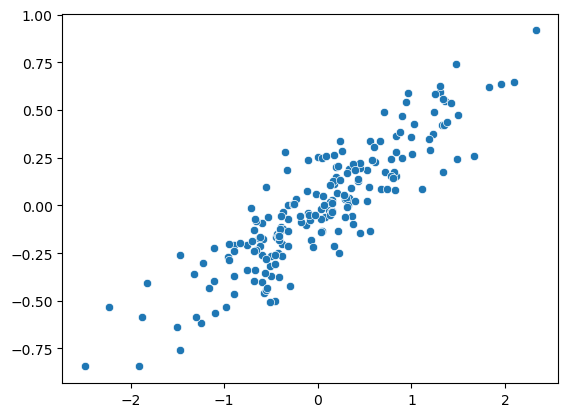

In [41]:
import numpy as np
import seaborn as sns
from sklearn import datasets

reg = np.random.RandomState(1)
arr = np.dot(reg.rand(2, 2), reg.randn(2, 200)).T
sns.scatterplot(x = arr[:,0], y = arr[:,1] )

##### __(a) Subtract the mean of the attributes__

In [42]:
arr[:, 0] = arr[:, 0] - np.mean(arr[:, 0])
arr[:, 1] = arr[:, 1] - np.mean(arr[:, 1])

##### __(b) Compute the covariance matrix__ _(Hint: use ``numpy.cov()``)_

In [43]:
cov = np.cov(arr, rowvar=False)
cov

array([[0.68217761, 0.23093475],
       [0.23093475, 0.09883179]])

##### __(c) Determine the eigenvalues/eigenvectors of the matrix__ _(Hint: use ``numpy.linalg.eig()``)_

In [44]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

##### __(d) Transform the data using the eigenvectors and plot the result.__

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

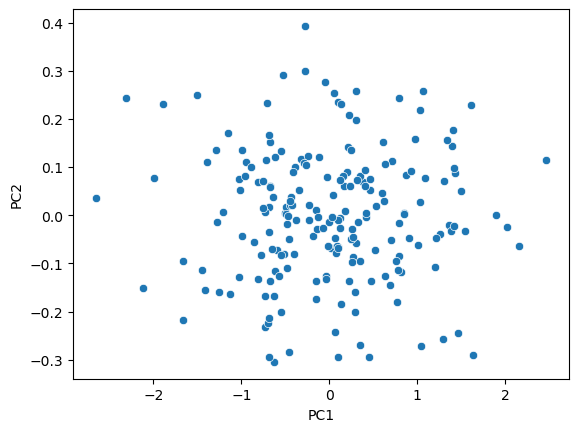

In [48]:
transformed = arr.dot(eigenvectors)

ax = sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1])
ax.set(xlabel="PC1", ylabel="PC2")

##### __(e) Name the percentage of the data variance that the first principle component already covers. (Calculate the ratio between the first eigenvalue and the sum of all eigenvalues)__

In [50]:
eigenvalues[0] / sum(eigenvalues)

0.9763410074208768

##### __(f) Imagine you have a dataset with 5 attributes. How many Eigenvalues would you get during step c?__

```
> Your answer.
```

---

#### Exercise 2: Linear Interpolation
Given the following dataset: 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame(np.array([[1, 3], [3, 8], [5, 16]]), columns=['time', 'temperature'])
df

,time,temperature
0,1,3
1,3,8
2,5,16


##### __(a) Implement a method that takes any non-existing hour of the day (x) in the dataset (e.g., x = 4) between two existing values and gives the corresponding Temperature (y). Use linear interpolation for that (see formula below).__ 

$ y = y_1 + (y_2 - y_1) * \frac{x - x_1}{x_2 - x_1}$

_(Hint: x and y are the values you are looking for to fill any non-existing pair of time and corresponding temperature. The other elements in the formula you should get from the existing data.)_

##### __(b)  Use your method from (a) to interpolate and create new data points for ``x = 2`` and ``x = 4``. Visualize in a scatter plot the provided dataset and the two new data points you just created.__

---

#### Exercise 3: Sampling Strategies

Please install `sklearn` for the following exercise.

In [11]:
import numpy as np
from sklearn.utils import resample

y = np.random.choice([0,1],size=1000, p=[.2,.8])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,

##### __(a) Apply random sampling and select `10` elements from the array `y`.__ _(Use the method `np.random.choice`)_

##### __(b) Resample the array `y` with the `resample` method and extract `10` samples. Sample the data in stratified fashion.__

##### __(c) Explain the difference between the applied methods and the results in `(a)` and `(b)`__

```
> Your answer.
```

---

#### Exercise 4: Decision Tree
You need to decide whether an incoming E-Mail is spam or not. The following attributes are stored for each E-Mail: TimeZone, GeoLocation, SuspiciousSubject, SuspiciousBody.

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|3|EU|US|No|Yes|Spam|
|4|AS|EU|No|Yes|Spam|
|5|AS|AS|Yes|Yes|Spam|
|6|AS|AS|Yes|No|NoSpam|
|7|EU|AS|Yes|No|Spam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|10|AS|EU|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|
|12|EU|EU|No|No|Spam|
|13|EU|US|Yes|Yes|Spam|
|14|AS|EU|No|No|NoSpam|

##### __Construct a decision tree based on the data of Table 2 by hand. Use the Information Gain as impurity measure. Multiple splits are allowed. If all records in one leave share the same class label, your tree has to terminate.__
__Comment on the steps you performed to create the decision tree. Show the results of your calculations and draw plot the final decision tree using.__ 

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. Use this to include the created or handdrawn plot of the decision tree. Do not forget to also upload the image in your final submission.)_

```
> Your answer.
```

---

#### Exercise 5: Decision Tree in Python
In this task we will train and display a decision tree for the ``iris.csv``data in Python. Only use the already imported packages. 

The classes of the flowers are mapped to numbers as follows: ``Iris-Setosa = 0``, ``Iris-Versicolour = 1``, ``Iris-Virginica = 2``

In [12]:
import pandas as pd 
from sklearn import tree

##### __(a) Create a decision tree using the information gain and train the decision tree with the iris data. Use the ``species`` column as the target variable__ 

##### __(b) Display the decision tree from (a). Explain the result in the following markdown cell.__ _(Hint: use the ``sklearn.tree.plot_tree`` or the ``sklearn.tree.export_graphviz`` method)_

```
> Your answer.
```

---